In [46]:
import bql
import numpy as np
from IPython.display import display, clear_output
import pandas as pd
import time 
import datetime
from ipywidgets import *
from bqplot import *
from bqplot.interacts import *

from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

bq = bql.Service()
d = bq.data
f = bq.func
u = bq.univ

In [47]:
# INPUTS ###############

equity_idx = ['RAY Index', 'SPX Index', 'NKY Index', 'MCXP Index', 'CCMP Index', 'DAX Index', 'MXEU000G Index', 'SCXP Index', 'SMI Index']

index_universe = ['HFRIFOF Index'] + equity_idx

start_date = datetime.datetime(2008,12,31)
end_date = datetime.datetime(2018,12,31)

APLICAR LO SIGUIENTE PARA UNA MATRIZ DE PRECIOS TAL QUE EN LAS COLUMNAS VAYAN LOS ACTIVOS Y EN LAS FILAS LOS PERIODOS TEMPORALES:

https://tektrace.wordpress.com/2016/04/09/lasso-regression-in-python-scikit-learn/
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html#sklearn.linear_model.LassoCV

Recuerda que la X es una lista de listas, por ejemplo: la primera lista de X serán los precios normalizados de los índices de RV para la primera fecha, la segunda fecha los precios normalizados de la segunda fecha y así hasta la última fecha, que será la última lista de valores dentro de la lista de X. La lista de la y serán los precios normalizados de HFRIFOF.


In [48]:
price = d.px_last(start = start_date, end = end_date, per = 'M', fill='prev', currency = 'USD')
price = f.znav(f.pct_diff(f.zscore(price)))/100
price = 1-f.cumprod(price + 1)
# request = bql.Request(index_universe[0], {index_universe[0]: price}, preferences={'currencycheck':'ignore'})
# res = bq.execute(request)
# res[0].df()

for i in range(len(index_universe)):
    request = bql.Request(index_universe[i], {index_universe[i]: price}, preferences={'currencycheck':'ignore'}) #There's an error with de currencies of these tickers. This way we "solve" the issue
    res = bq.execute(request)
    
    asset = res[0].df()
    asset = pd.DataFrame({index_universe[i]: asset[index_universe[i]].tolist(), 'DATE': asset['DATE'].tolist()}, index= list(range(len(asset))))
    
    year_list = pd.DatetimeIndex(asset['DATE']).year.tolist()
    month_list = pd.DatetimeIndex(asset['DATE']).month.tolist()
    date_list = []
    for j in range(len(year_list)):
        date_list += [str(year_list[j]) + '-' + str(month_list[j])]
    asset['aux_date'] = date_list    
    
    if i == 0:
        matrix = asset.copy(deep=True)
    else :
        asset = asset.drop(['DATE'], axis=1)
        matrix = pd.merge(matrix, asset, how='left', on=['aux_date', 'aux_date'])
        
matrix

DATE  HFRIFOF Index aux_date  RAY Index  SPX Index  NKY Index  \
0   2008-12-31       0.000000  2008-12   0.000000   0.000000   0.000000   
1   2009-01-31       0.029951   2009-1  -0.084499  -0.089966  -0.205327   
2   2009-02-28       0.014224   2009-2  -0.182407  -0.195531  -0.465261   
3   2009-03-31       0.015366   2009-3  -0.113310  -0.122540  -0.367703   
4   2009-04-30       0.059832   2009-4  -0.022289  -0.035403  -0.196798   
5   2009-05-31       0.201580   2009-5   0.026962   0.018470   0.034375   
6   2009-06-30       0.218307   2009-6   0.028612   0.018684   0.118646   
7   2009-07-31       0.286257   2009-7   0.106635   0.097927   0.253990   
8   2009-08-31       0.335399   2009-8   0.143406   0.136472   0.334082   
9   2009-09-30       0.414261   2009-9   0.189170   0.178859   0.333270   
10  2009-10-31       0.410129  2009-10   0.157512   0.154576   0.299837   
11  2009-11-30       0.446932  2009-11   0.219977   0.223684   0.227918   
12  2009-12-31       0.482180  2009-12   0.252552   0.246326   0.359427   
13  2010-01-31       0.464900   2010-1   0.206545   0.198381   0.326951   
14  2010-02-28       0.471006   2010-2   0.244484   0.233990   0.355048   
15  2010-03-31       0.548395   2010-3   0.320409   0.309496   0.460469   
16  2010-04-30       0.591181   2010-4   0.347458   0.329563   0.435814   
17  2010-05-31       0.466716   2010-5   0.239036   0.216447   0.203701   
18  2010-06-30       0.425343   2010-6   0.166400   0.148198   0.175266   
19  2010-07-31       0.461009   2010-7   0.245426   0.230622   0.273282   
20  2010-08-31       0.466925   2010-8   0.184618   0.169844   0.152654   
21  2010-09-30       0.576539   2010-9   0.293749   0.276672   0.316920   
22  2010-10-31       0.647336  2010-10   0.342575   0.325573   0.363152   
23  2010-11-30       0.642589  2010-11   0.347422   0.322428   0.464151   
24  2010-12-31       0.749456  2010-12   0.436154   0.412056   0.604711   
25  2011-01-31       0.756671   2011-1   0.465991   0.445177   0.599318   
26  2011-02-28       0.798047   2011-2   0.516109   0.492970   0.708845   
27  2011-03-31       0.793290   2011-3   0.520704   0.491346   0.440075   
28  2011-04-30       0.854335   2011-4   0.564177   0.535280   0.506989   
29  2011-05-31       0.799584   2011-5   0.543357   0.513868   0.471426   
..         ...            ...      ...        ...        ...        ...   
91  2016-07-31       1.231730   2016-7   1.455253   1.477093   1.425941   
92  2016-08-31       1.255617   2016-8   1.455657   1.474012   1.462199   
93  2016-09-30       1.273885   2016-9   1.455891   1.470896   1.432442   
94  2016-10-31       1.258404  2016-10   1.400278   1.421921   1.517118   
95  2016-11-30       1.272446  2016-11   1.501033   1.506406   1.393078   
96  2016-12-31       1.321215  2016-12   1.545673   1.552939   1.470335   
97  2017-01-31       1.377203   2017-1   1.590942   1.599496   1.573859   
98  2017-02-28       1.427582   2017-2   1.681183   1.698062   1.625020   
99  2017-03-31       1.452920   2017-3   1.678652   1.696992   1.604516   
100 2017-04-30       1.481576   2017-4   1.704079   1.721968   1.658427   
101 2017-05-31       1.499901   2017-5   1.725527   1.754060   1.776160   
102 2017-06-30       1.498487   2017-6   1.745962   1.767560   1.792979   
103 2017-07-31       1.556659   2017-7   1.794560   1.822081   1.841086   
104 2017-08-31       1.604374   2017-8   1.793578   1.823651   1.794014   
105 2017-09-30       1.630154   2017-9   1.857655   1.879126   1.847489   
106 2017-10-31       1.697407  2017-10   1.916832   1.944123   2.135230   
107 2017-11-30       1.696509  2017-11   1.998266   2.028213   2.321916   
108 2017-12-31       1.750637  2017-12   2.024084   2.058480   2.327046   
109 2018-01-31       1.889618   2018-1   2.180178   2.233125   2.528218   
110 2018-02-28       1.796193   2018-2   2.057196   2.105245   2.428854   
111 2018-03-31       1.766713   2018-3   1.991292   2.020411   2.321875   
112 2018-04-30       1.778851   201

In [49]:
X = []
for i in range(len(matrix)):
    X.append(np.array(matrix.iloc[i][equity_idx].tolist()))
X = np.array(X)
y = np.array(matrix['HFRIFOF Index'])
print(len(X), ' ', len(y))

121   121


C:\blp\BQuant\environments\bqnt-1.8.1\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


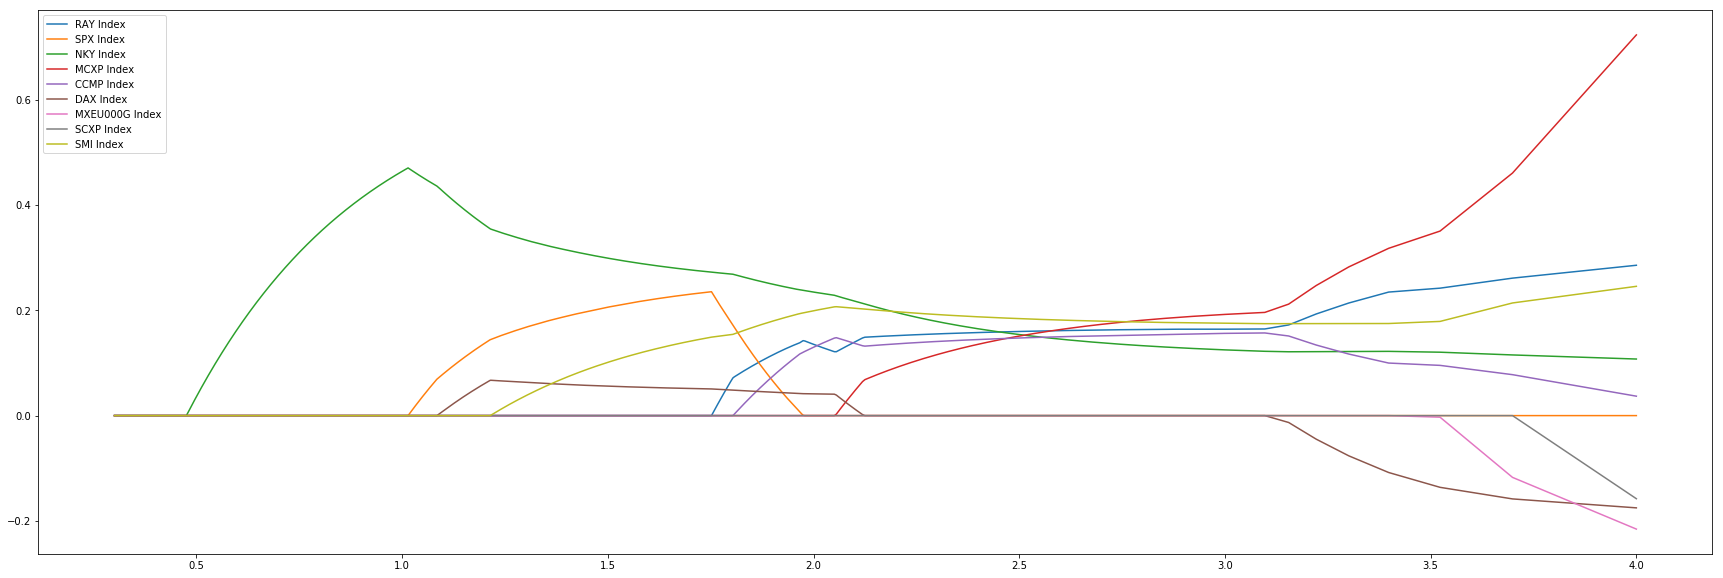

In [50]:
from sklearn import linear_model

list_alphas = np.arange(0.0001, 0.5, 0.0001)

weights = []
for coef_alpha in list_alphas:
    model = linear_model.Lasso(alpha=coef_alpha).fit(X,y)
    weights.append(model.coef_)

plt.figure(figsize=(30, 10))

for i in range(len(equity_idx)):
    aux_weight = []
    for ii in range(len(list_alphas)):
        aux_weight += [weights[ii][i]]
        
    plt.plot(-np.log10(list_alphas), aux_weight, label= equity_idx[i])

plt.legend()
plt.show()    


In [51]:
# from sklearn.linear_model import LassoCV
# from bqplot import *

# model = LassoCV(cv=12).fit(X, y)
# print(model.coef_)
# print(equity_idx)
# xs = OrdinalScale()
# ys = LinearScale()
# bar = Bars(x=equity_idx, y=model.coef_, scales={'x': xs, 'y': ys}, padding=0.5)

# xax = Axis(scale=xs, tick_rotate=45)
# yax = Axis(scale=ys, orientation='vertical', tick_format='0.0%', grid_lines='solid')

# plot = Figure(marks=[bar], axes=[xax, yax])
# plot.layout.width = '1500px'
# plot

In [52]:
# m_log_alphascv = -np.log10(model.alphas_)
# plt.figure()
# plt.plot(m_log_alphascv, model.mse_path_, ':')
# plt.plot(m_log_alphascv, model.mse_path_.mean(axis=-1), 'k',label='Average across the folds', linewidth=2)
# plt.axvline(-np.log10(model.alpha_), color='k',label='alpha CV')
# plt.legend()
# plt.xlabel('-log(alpha)')
# plt.ylabel('Mean squared error')
# plt.title('Mean squared error on each fold')
# plt.show()

In [55]:
matrix.to_excel('matrix2.xlsx')